### Load Libraries and Dataset

Loading all the required libraries and datasets for the classification of mobile price range.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Preprocessing
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [3]:
# Loading Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Let's take a copy of train and test data

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
test.drop(['id'], axis=1, inplace=True)

In [9]:
test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [10]:
# Print data types for each variable
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [11]:
# Shape of the dataset
train.shape

(2000, 21)

In [12]:
test.shape

(1000, 20)

In [13]:
# Unique values in label
train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [14]:
train['price_range'].nunique()

4

In [15]:
# Frequency table
train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [16]:
# Normalize can be set to True to print proportions instead of number ( percentage distribution )
train['price_range'].value_counts(normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

<AxesSubplot:>

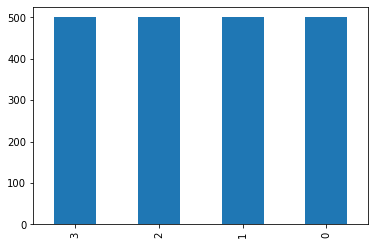

In [17]:
train['price_range'].value_counts().plot.bar()

### Visualize  Features

<AxesSubplot:title={'center':'battery_power'}>

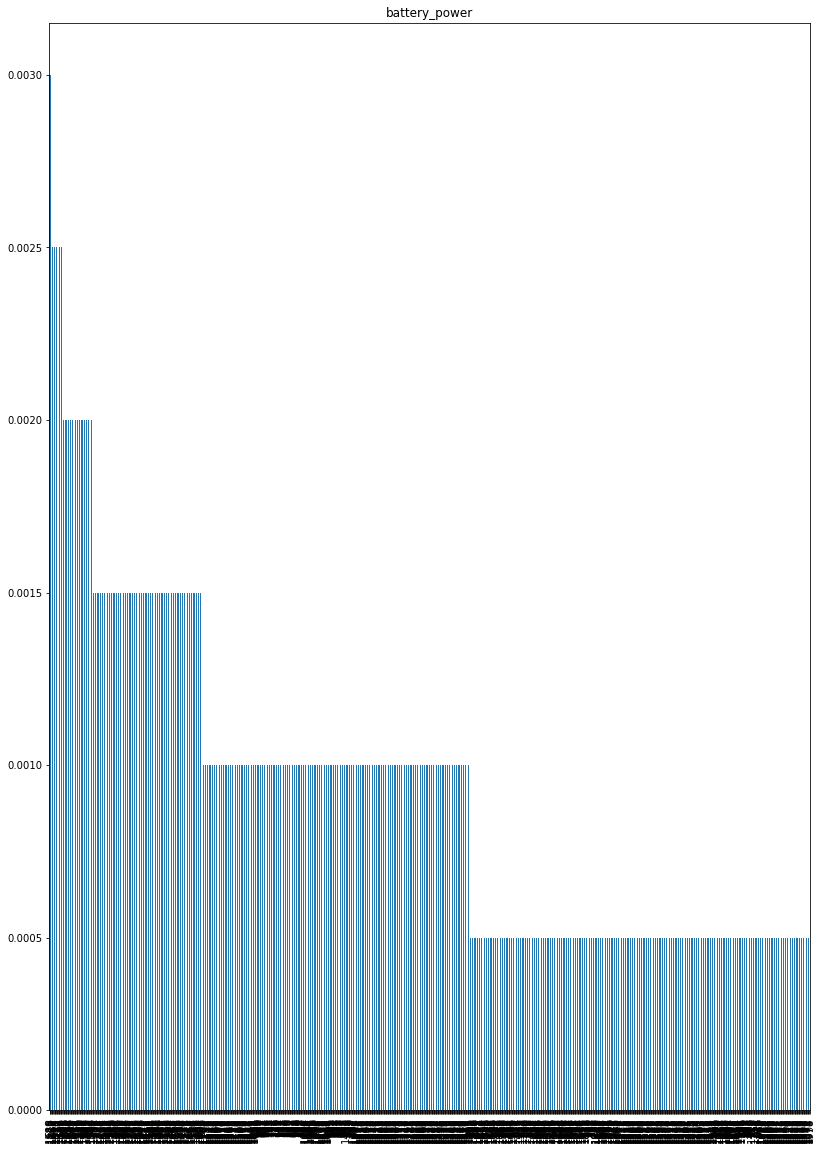

In [18]:
plt.figure(1)
plt.subplot(121)
train['battery_power'].value_counts(normalize=True).plot.bar(figsize=(30,20), title='battery_power')

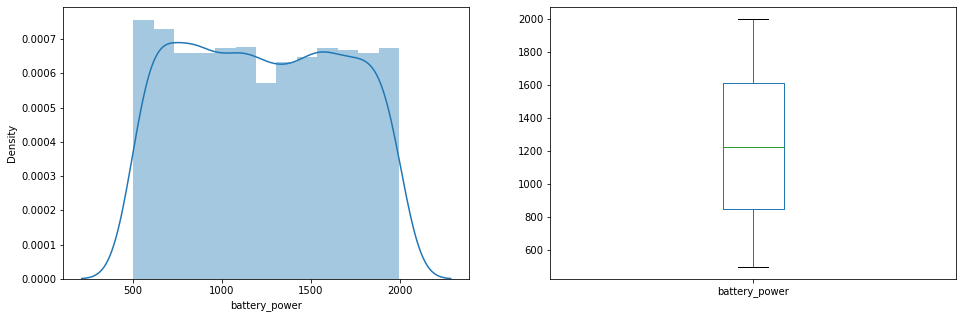

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['battery_power'])
plt.subplot(122)
train['battery_power'].plot.box(figsize=(16,5))
plt.show()

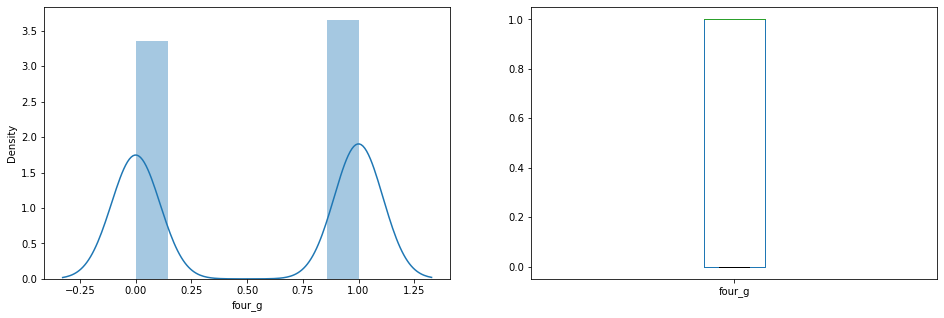

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['four_g'])
plt.subplot(122)
train['four_g'].plot.box(figsize=(16,5))
plt.show()

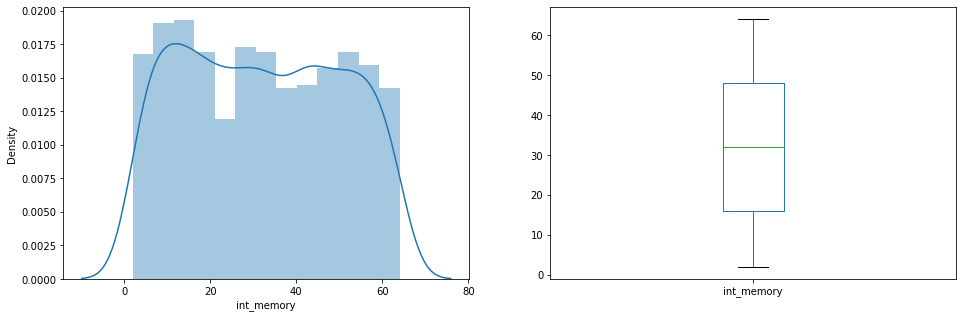

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['int_memory'])
plt.subplot(122)
train['int_memory'].plot.box(figsize=(16,5))
plt.show()

### Independent Variable v/s Target Variable

<AxesSubplot:xlabel='blue'>

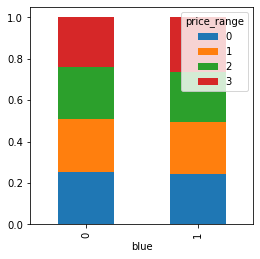

In [22]:
blue = pd.crosstab(train['blue'], train['price_range'])
blue.div(blue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='dual_sim'>

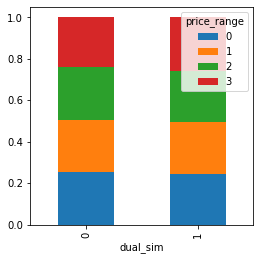

In [23]:
dual_sim = pd.crosstab(train['dual_sim'], train['price_range'])
dual_sim.div(dual_sim.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='fc'>

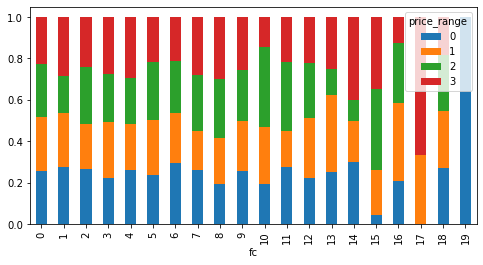

In [24]:
fc = pd.crosstab(train['fc'], train['price_range'])
fc.div(fc.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,4))

<AxesSubplot:xlabel='four_g'>

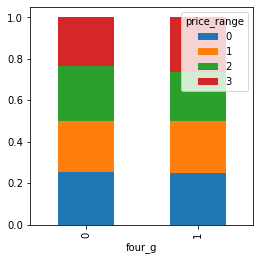

In [25]:
four_g = pd.crosstab(train['four_g'], train['price_range'])
four_g.div(four_g.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='n_cores'>

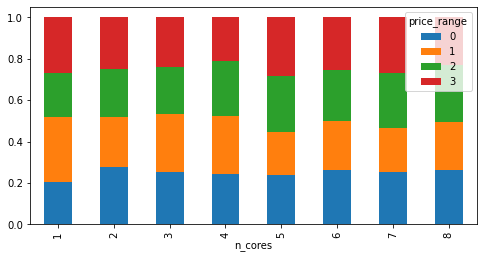

In [26]:
n_cores = pd.crosstab(train['n_cores'], train['price_range'])
n_cores.div(n_cores.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,4))

<AxesSubplot:xlabel='sc_h'>

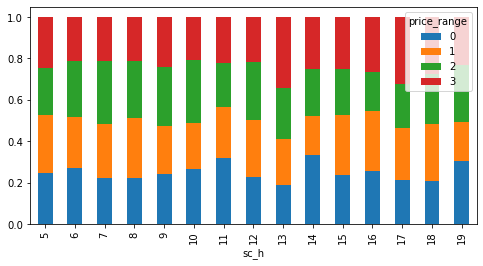

In [27]:
sc_h = pd.crosstab(train['sc_h'], train['price_range'])
sc_h.div(sc_h.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,4))

<AxesSubplot:xlabel='three_g'>

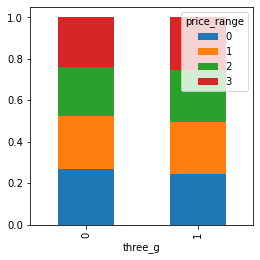

In [28]:
three_g = pd.crosstab(train['three_g'], train['price_range'])
three_g.div(three_g.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='wifi'>

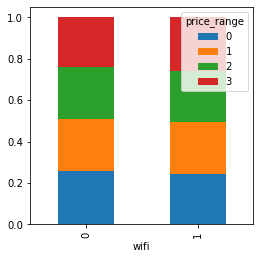

In [29]:
wifi = pd.crosstab(train['wifi'], train['price_range'])
wifi.div(wifi.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='touch_screen'>

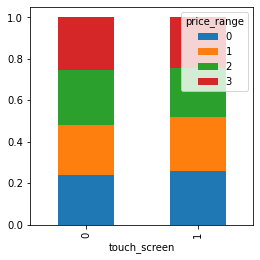

In [30]:
touch_screen = pd.crosstab(train['touch_screen'], train['price_range'])
touch_screen.div(touch_screen.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='price_range'>

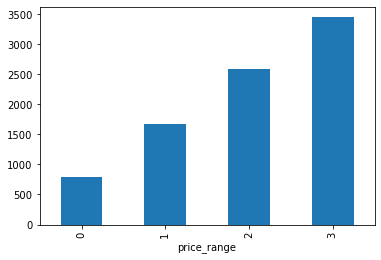

In [31]:
train.groupby('price_range')['ram'].mean().plot.bar()

<AxesSubplot:xlabel='price_range'>

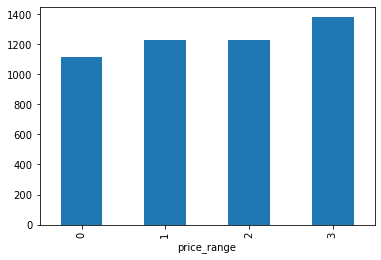

In [32]:
train.groupby('price_range')['battery_power'].mean().plot.bar()

<AxesSubplot:xlabel='price_range'>

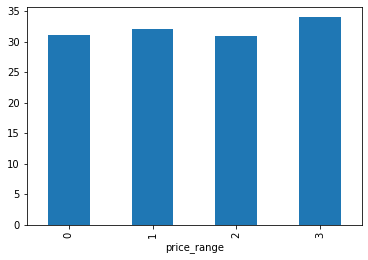

In [33]:
train.groupby('price_range')['int_memory'].mean().plot.bar()

<AxesSubplot:>

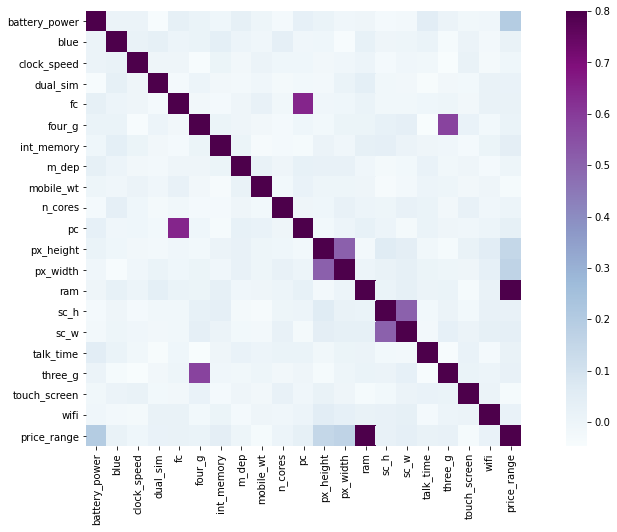

In [34]:
# Heat map to visualize the correlation between all the numerical variables.

matrix = train.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

### Finding Missing Values

In [35]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [36]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [37]:
X = train.drop('price_range', 1)
y = train.price_range

In [38]:
class0 = train_original[train_original['price_range']==0]
class0.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1116.902000,0.486000,1.550200,0.500000,4.084000,0.518000,31.174000,0.490200,140.552000,4.600000,...,536.408000,1150.27000,785.314000,12.324000,5.682000,10.612000,0.746000,0.524000,0.496000,0.0
std,410.801305,0.500305,0.848941,0.500501,4.183772,0.500176,18.101023,0.288184,36.378319,2.268544,...,372.824164,413.00178,362.755397,4.206949,4.174173,5.397009,0.435734,0.499924,0.500485,0.0
min,503.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.00000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,770.500000,0.000000,0.600000,0.000000,1.000000,0.000000,15.000000,0.200000,108.750000,3.000000,...,229.000000,805.75000,488.750000,9.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.0
50%,1066.000000,0.000000,1.550000,0.500000,3.000000,1.000000,30.000000,0.500000,142.000000,5.000000,...,465.500000,1132.50000,719.500000,12.000000,5.000000,10.000000,1.000000,1.000000,0.000000,0.0
75%,1431.250000,1.000000,2.300000,1.000000,6.000000,1.000000,47.000000,0.700000,173.000000,7.000000,...,776.500000,1452.75000,1037.000000,16.000000,8.250000,15.000000,1.000000,1.000000,1.000000,0.0
max,1994.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1878.000000,1989.00000,1974.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,0.0


In [39]:
class1 = train_original[train_original['price_range']==1]
class1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1228.868000,0.490000,1.488600,0.510000,4.340000,0.524000,32.116000,0.524000,140.510000,4.298000,...,666.892000,1251.908000,1679.490000,12.212000,5.544000,11.362000,0.756000,0.522000,0.504000,1.0
std,438.614528,0.500401,0.814479,0.500401,4.499432,0.499924,18.000739,0.286895,35.678956,2.311684,...,441.351209,433.564352,465.850159,4.226913,4.238868,5.570729,0.429923,0.500016,0.500485,0.0
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,387.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,843.000000,0.000000,0.600000,0.000000,1.000000,0.000000,16.000000,0.300000,109.000000,2.000000,...,327.250000,878.750000,1354.000000,8.000000,2.000000,7.000000,1.000000,0.000000,0.000000,1.0
50%,1206.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,606.000000,1223.000000,1686.500000,12.000000,5.000000,12.000000,1.000000,1.000000,1.000000,1.0
75%,1596.250000,1.000000,2.200000,1.000000,7.000000,1.000000,47.000000,0.800000,170.000000,6.000000,...,944.250000,1629.000000,2033.750000,16.000000,8.000000,16.000000,1.000000,1.000000,1.000000,1.0
max,1996.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1914.000000,1998.000000,2811.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.0


In [40]:
class2 = train_original[train_original['price_range']==2]
class2.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.0
mean,1228.320000,0.486000,1.529800,0.498000,4.49800,0.494000,30.920000,0.490800,143.614000,4.682000,...,632.284000,1234.046000,2582.816000,12.010000,5.714000,10.97200,0.774000,0.470000,0.504000,2.0
std,452.863065,0.500305,0.804404,0.500497,4.34739,0.500465,18.441958,0.286215,34.320326,2.262546,...,445.789232,427.757151,496.211735,4.234355,4.265747,5.43307,0.418658,0.499599,0.500485,0.0
min,501.000000,0.000000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,...,10.000000,508.000000,1185.000000,5.000000,0.000000,2.00000,0.000000,0.000000,0.000000,2.0
25%,816.500000,0.000000,0.700000,0.000000,1.00000,0.000000,15.000000,0.200000,114.000000,3.000000,...,252.500000,862.500000,2292.750000,8.000000,2.000000,6.00000,1.000000,0.000000,0.000000,2.0
50%,1219.500000,0.000000,1.500000,0.000000,3.00000,0.000000,30.000000,0.500000,145.000000,5.000000,...,538.500000,1221.500000,2577.000000,12.000000,5.000000,11.00000,1.000000,0.000000,1.000000,2.0
75%,1635.750000,1.000000,2.200000,1.000000,7.00000,1.000000,48.000000,0.700000,172.000000,7.000000,...,942.750000,1613.250000,2927.000000,16.000000,8.000000,16.00000,1.000000,1.000000,1.000000,2.0
max,1998.000000,1.000000,3.000000,1.000000,18.00000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1997.000000,3916.000000,19.000000,17.000000,20.00000,1.000000,1.000000,1.000000,2.0


In [41]:
class3 = train_original[train_original['price_range']==3]
class3.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1379.984000,0.518000,1.52040,0.530000,4.316000,0.550000,33.976000,0.502000,136.320000,4.502000,...,744.848000,1369.838000,3449.232000,12.680000,6.12800,11.098000,0.770000,0.496000,0.524000,3.0
std,414.992261,0.500176,0.79645,0.499599,4.332399,0.497992,17.930377,0.291901,34.911994,2.297074,...,483.720179,426.823571,393.019923,4.168976,4.71679,5.443129,0.421254,0.500485,0.499924,0.0
min,503.000000,0.000000,0.50000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,501.000000,2259.000000,5.000000,0.00000,2.000000,0.000000,0.000000,0.000000,3.0
25%,1034.750000,0.000000,0.70000,0.000000,1.000000,0.000000,18.000000,0.200000,104.000000,2.000000,...,341.750000,1041.500000,3207.500000,9.000000,2.00000,7.000000,1.000000,0.000000,0.000000,3.0
50%,1449.500000,1.000000,1.50000,1.000000,3.000000,1.000000,34.500000,0.500000,134.000000,5.000000,...,674.000000,1415.500000,3509.500000,13.000000,5.00000,11.000000,1.000000,0.000000,1.000000,3.0
75%,1733.500000,1.000000,2.20000,1.000000,7.000000,1.000000,49.000000,0.800000,165.000000,7.000000,...,1109.500000,1746.250000,3764.750000,16.000000,10.00000,16.000000,1.000000,1.000000,1.000000,3.0
max,1994.000000,1.000000,3.00000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1949.000000,1995.000000,3998.000000,19.000000,18.00000,20.000000,1.000000,1.000000,1.000000,3.0


In [42]:
class0.shape, class1.shape, class2.shape, class3.shape,

((500, 21), (500, 21), (500, 21), (500, 21))

### Stratified k-fold cross validation Decision tree model

In [43]:
i = 1
l = 0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}' .format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    l+=score
pred_test = model.predict(test)
pred= model.predict_proba(xvl)[:, 1] 
print('\n accuracy :', l/5)


1 of kfold 5
accuracy_score 0.82

2 of kfold 5
accuracy_score 0.84

3 of kfold 5
accuracy_score 0.8325

4 of kfold 5
accuracy_score 0.83

5 of kfold 5
accuracy_score 0.835

 accuracy : 0.8314999999999999


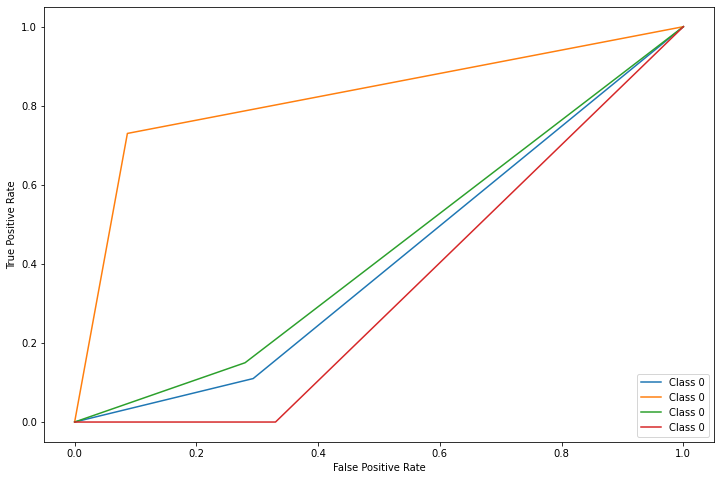

In [44]:
fpr = {}
tpr = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(yvl, pred, pos_label = i)
    
plt.figure(figsize=(12,8))

plt.plot(fpr[0], tpr[0], label = 'Class 0')
plt.plot(fpr[1], tpr[1], label = 'Class 0')
plt.plot(fpr[2], tpr[2], label = 'Class 0')
plt.plot(fpr[3], tpr[3], label = 'Class 0')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Stratified k-fold cross validation Random forest model

In [45]:
i = 1
l = 0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold{}' .format(i, kf.n_splits))
    xtr, xvl  = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
    l += score
    
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]
print('\n Accuracy : ', 1/5)


1 of kfold5
accuracy_score 0.8675

2 of kfold5
accuracy_score 0.9025

3 of kfold5
accuracy_score 0.875

4 of kfold5
accuracy_score 0.875

5 of kfold5
accuracy_score 0.8775

 Accuracy :  0.2


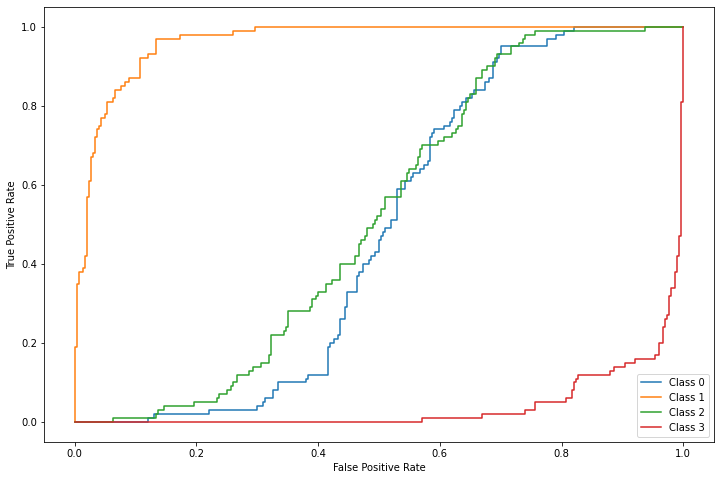

In [46]:
fpr = {}
tpr = {}
thresh ={}
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i] , thresh[i]= roc_curve(yvl,  pred, pos_label=i) 

plt.figure(figsize=(12,8)) 

plt.plot(fpr[0],tpr[0],label="Class 0") 
plt.plot(fpr[1],tpr[1],label="Class 1") 
plt.plot(fpr[2],tpr[2],label="Class 2") 
plt.plot(fpr[3],tpr[3],label="Class 3") 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Hyperparameter tuning

In [47]:
paramgrid = {'max_depth':list(range(1,20,2)), 'n_estimators':list(range(1,200,20))}

In [48]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [52]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=17, n_estimators=161, random_state=1)

In [53]:
#  Now let’s build the model using these optimized values.

In [54]:
i=1 
l=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=17, n_estimators=161)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)  
    i+=1 
    l +=score
    
pred_test = model.predict(test) 
pred2=model.predict_proba(xvl)[:,1]
print('\n score',l/5)


1 of kfold 5
accuracy_score 0.88

2 of kfold 5
accuracy_score 0.895

3 of kfold 5
accuracy_score 0.8875

4 of kfold 5
accuracy_score 0.8775

5 of kfold 5
accuracy_score 0.895

 score 0.8869999999999999


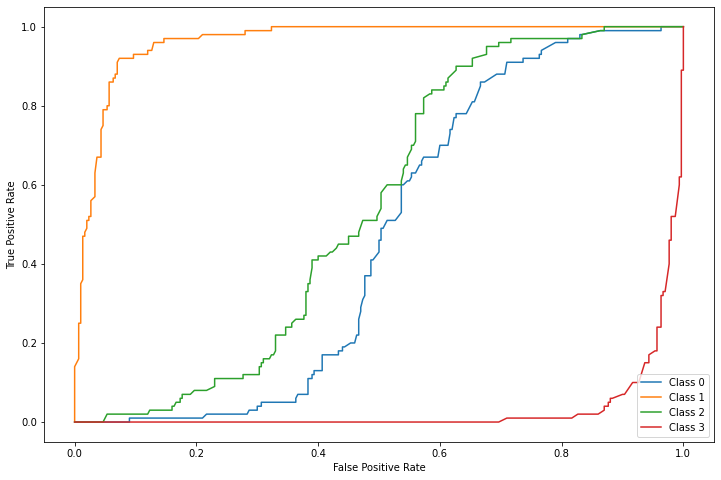

In [55]:
fpr = {}
tpr = {}
thresh ={}
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i] , thresh[i]= roc_curve(yvl,  pred2, pos_label=i) 

plt.figure(figsize=(12,8)) 

plt.plot(fpr[0],tpr[0],label="Class 0") 
plt.plot(fpr[1],tpr[1],label="Class 1") 
plt.plot(fpr[2],tpr[2],label="Class 2") 
plt.plot(fpr[3],tpr[3],label="Class 3") 

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Feature Importance

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
clf = SVC(gamma='scale')
clf.fit(x_train, y_train)
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.955625, 0.94)

In [58]:
results={}
for name, col in x_train.items():
    temp_x_train = x_train.copy()
    temp_x_train[name] = np.random.permutation(col)
    results[name] = clf.score(temp_x_train, y_train)

In [59]:
feature_imp = pd.Series(results).sort_values()
feature_imp

ram              0.263125
battery_power    0.762500
px_height        0.857500
px_width         0.860000
mobile_wt        0.955000
three_g          0.955625
talk_time        0.955625
sc_w             0.955625
sc_h             0.955625
pc               0.955625
n_cores          0.955625
m_dep            0.955625
int_memory       0.955625
four_g           0.955625
fc               0.955625
dual_sim         0.955625
clock_speed      0.955625
blue             0.955625
touch_screen     0.955625
wifi             0.955625
dtype: float64

<AxesSubplot:>

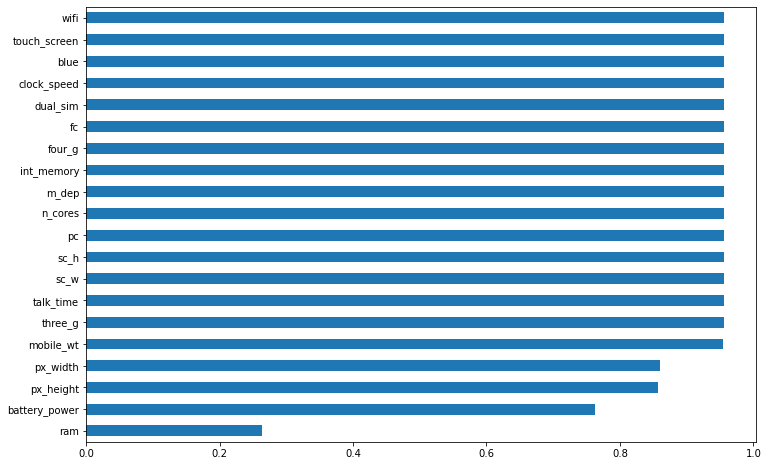

In [60]:
feature_imp.plot.barh(figsize=(12,8))

In [61]:
X_after_drop = X.drop(['ram'], axis=1)
test_after_drop = test.drop(['ram'], axis=1)

In [62]:
test_after_drop

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,15,11,6,0,1,0


In [63]:
X_after_drop

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,18,10,19,1,1,1
